# Addressing Class Imbalance

# Resampling Technique
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).
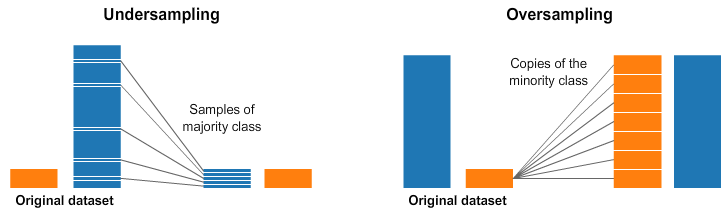

In [1]:
import Excalibur as tmp

In [2]:
file_path = 'health.csv'
label = 'stroke'
strkdf =tmp.load_file(file_path)

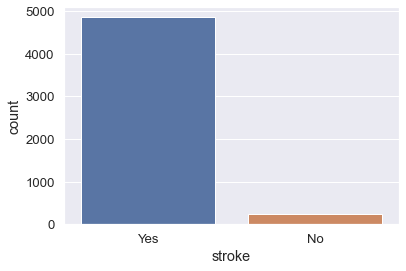

In [3]:
# visualize the target variable
import matplotlib.pyplot as plt  
import seaborn as sns
g = sns.countplot(strkdf[label])
g.set_xticklabels(['Yes','No'])
plt.show()

In [4]:
#We will start by separating the class that will be 0 and class 1.
# class count
class_count_0, class_count_1 = strkdf[label].value_counts()

# Separate class
class_0 = strkdf[strkdf[label] == 0]
class_1 = strkdf[strkdf[label] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4861, 12)
class 1: (249, 12)


# Random Under-Sampling 
Removing some observations of the majority class. This is done until the majority and minority class is balanced out.
Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable

total class of 1 and0: 1    249
0    249
Name: stroke, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

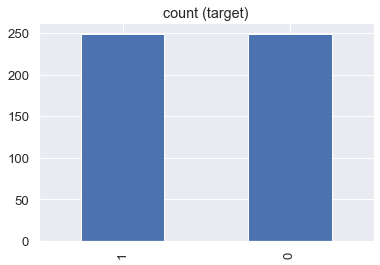

In [5]:
class_0_under = class_0.sample(class_count_1)

test_under = tmp.pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under[label].value_counts())# plot the count after under-sampeling
test_under[label].value_counts().plot(kind='bar', title='count (target)')

In [6]:
cols = ["age", "hypertension", "heart_disease","avg_glucose_level", "bmi", "stroke"]
strkdf = tmp.change_type(cols, 'numeric', strkdf)

In [7]:
#columns to interploate
cols = ['bmi']
strkdf = tmp.missing_val(strkdf, cols, 'interpolate')
strkdf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.30,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [8]:
strkdf = tmp.remove_col(strkdf, 'id')

In [9]:
strkdf = tmp.onehotencoding(strkdf)

In [10]:
strkdf.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

============ LogReg ===========
Prediction Vector: 
 [1 1 1 ... 0 0 1]

 Accuracy: 
 74.16829745596868

 Precision of event Happening: 
 13.541666666666666

 Recall of event Happening: 
 72.22222222222221

 AUC: 
 0.7324954086317723

 F-Score:
 0.22807017543859648

 Confusion Matrix: 
 [[719 249]
 [ 15  39]]
AUC Plot


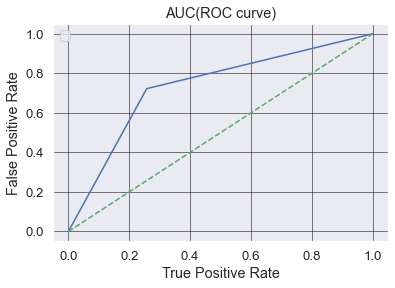


============ KNN ===========
Prediction Vector: 
 [0 1 1 ... 0 1 0]

 Accuracy: 
 71.81996086105676

 Precision of event Happening: 
 13.4375

 Recall of event Happening: 
 79.62962962962963

 AUC: 
 0.7550696357514539

 F-Score:
 0.22994652406417113

 Confusion Matrix: 
 [[691 277]
 [ 11  43]]
AUC Plot


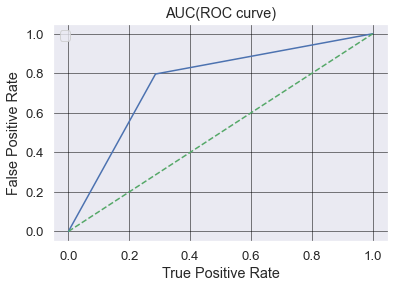


============ GadientBoosting ===========
Prediction Vector: 
 [1 1 1 ... 0 0 0]

 Accuracy: 
 74.07045009784736

 Precision of event Happening: 
 13.240418118466899

 Recall of event Happening: 
 70.37037037037037

 AUC: 
 0.723236149372513

 F-Score:
 0.22287390029325513

 Confusion Matrix: 
 [[719 249]
 [ 16  38]]
AUC Plot


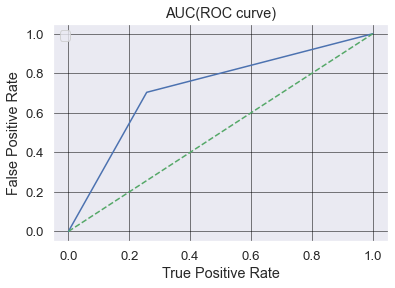


============ AdaBoost ===========
Prediction Vector: 
 [1 0 1 ... 0 0 0]

 Accuracy: 
 72.6027397260274

 Precision of event Happening: 
 12.080536912751679

 Recall of event Happening: 
 66.66666666666666

 AUC: 
 0.6980027548209367

 F-Score:
 0.20454545454545453

 Confusion Matrix: 
 [[706 262]
 [ 18  36]]
AUC Plot


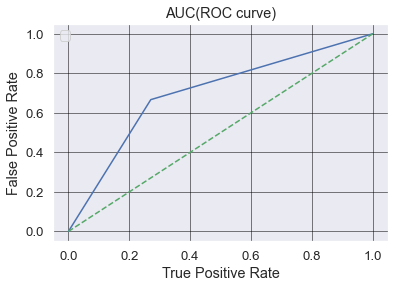


============ SVM ===========
Prediction Vector: 
 [1 1 1 ... 0 0 1]

 Accuracy: 
 70.15655577299414

 Precision of event Happening: 
 11.854103343465045

 Recall of event Happening: 
 72.22222222222221

 AUC: 
 0.7113177226813591

 F-Score:
 0.20365535248041775

 Confusion Matrix: 
 [[678 290]
 [ 15  39]]
AUC Plot


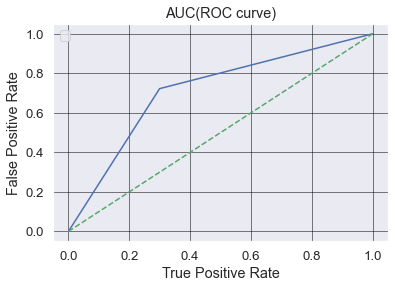


============ DecisionTree ===========
Prediction Vector: 
 [0 1 1 ... 0 1 1]

 Accuracy: 
 66.53620352250489

 Precision of event Happening: 
 9.776536312849162

 Recall of event Happening: 
 64.81481481481481

 AUC: 
 0.6572352310988674

 F-Score:
 0.1699029126213592

 Confusion Matrix: 
 [[645 323]
 [ 19  35]]
AUC Plot


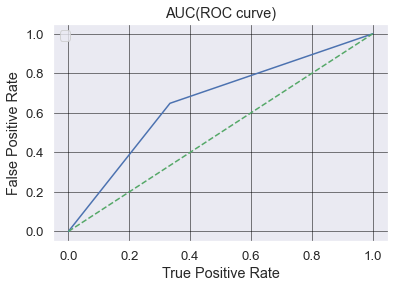


============ RandomForest ===========
Prediction Vector: 
 [1 1 1 ... 0 0 0]

 Accuracy: 
 74.46183953033268

 Precision of event Happening: 
 12.903225806451612

 Recall of event Happening: 
 66.66666666666666

 AUC: 
 0.7078168044077136

 F-Score:
 0.2162162162162162

 Confusion Matrix: 
 [[725 243]
 [ 18  36]]
AUC Plot


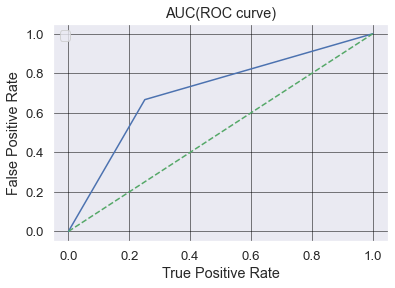


============ NaiveBayes ===========
Prediction Vector: 
 [1 1 1 ... 0 0 1]

 Accuracy: 
 61.05675146771037

 Precision of event Happening: 
 10.730593607305936

 Recall of event Happening: 
 87.03703703703704

 AUC: 
 0.7332223752678297

 F-Score:
 0.19105691056910568

 Confusion Matrix: 
 [[577 391]
 [  7  47]]
AUC Plot


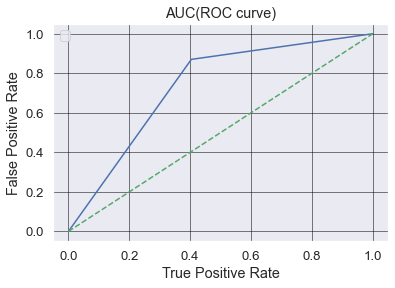


============ MultiLayerPerceptron ===========
Prediction Vector: 
 [1 1 1 ... 0 0 0]

 Accuracy: 
 68.4931506849315

 Precision of event Happening: 
 11.714285714285715

 Recall of event Happening: 
 75.92592592592592

 AUC: 
 0.7200221916131008

 F-Score:
 0.20297029702970298

 Confusion Matrix: 
 [[659 309]
 [ 13  41]]
AUC Plot


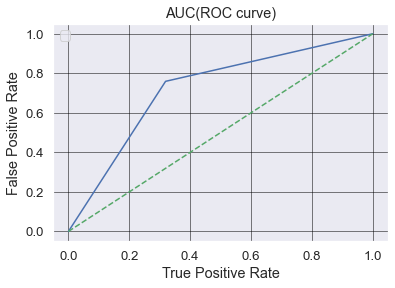


============ XgBoost ===========
[06:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction Vector: 
 [1 1 1 ... 0 1 1]

 Accuracy: 
 73.97260273972603

 Precision of event Happening: 
 12.676056338028168

 Recall of event Happening: 
 66.66666666666666

 AUC: 
 0.7052341597796142

 F-Score:
 0.21301775147928997

 Confusion Matrix: 
 [[720 248]
 [ 18  36]]
AUC Plot


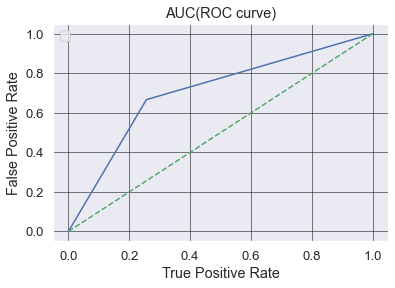


============ LightGbm ===========
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 195, number of negative: 195
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 390, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

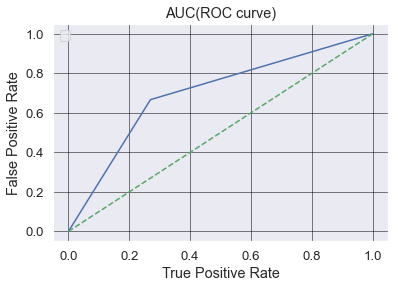

{'LogReg': LogisticRegression(),
 'KNN': KNeighborsClassifier(),
 'GadientBoosting': GradientBoostingClassifier(),
 'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=0),
 'SVM': SVC(),
 'DecisionTree': DecisionTreeClassifier(),
 'RandomForest': RandomForestClassifier(),
 'NaiveBayes': GaussianNB(),
 'MultiLayerPerceptron': MLPClassifier(hidden_layer_sizes=5),
 'XgBoost': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.01, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 'LightGbm': <lightgbm.basic.Bo

In [11]:
#All algo without FS, CV, Reg , addressing class imabalance
tmp.run_algorithms_cls_imb(strkdf, label)

In [12]:
#all algo with CV only
tmp.MachineLearningwith_cls_imb_CV(strkdf, label)

[06:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 224, number of negative: 225
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 449, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498886 -> initscore=-0.004454
[LightGBM] [Info] Start training from score -0.004454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

{'results': {'LogReg': {'accuracy': 78.10204081632654,
   'precision': 76.692707409736,
   'recall': 81.93333333333334,
   'auc_val': 0.7808333333333335,
   'f_score': 0.7885791325077038,
   'model_obj': LogisticRegression()},
  'KNN': {'accuracy': 78.91428571428571,
   'precision': 77.642552484786,
   'recall': 81.56666666666666,
   'auc_val': 0.7891666666666668,
   'f_score': 0.7929369407682101,
   'model_obj': KNeighborsClassifier()},
  'GadientBoosting': {'accuracy': 77.92244897959183,
   'precision': 77.34762880520002,
   'recall': 79.53333333333333,
   'auc_val': 0.7790833333333332,
   'f_score': 0.7827263100143419,
   'model_obj': GradientBoostingClassifier()},
  'AdaBoost': {'accuracy': 76.5265306122449,
   'precision': 75.22836975501772,
   'recall': 80.33333333333334,
   'auc_val': 0.76525,
   'f_score': 0.7749263853958401,
   'model_obj': AdaBoostClassifier(n_estimators=100, random_state=0)},
  'SVM': {'accuracy': 78.11428571428571,
   'precision': 75.76112431864536,
   'rec

age                               26.343109
avg_glucose_level                 24.682604
bmi                               22.565366
heart_disease                      3.093959
gender_Female                      2.477440
hypertension                       2.432532
gender_Male                        1.984676
work_type_Private                  1.935060
smoking_status_formerly smoked     1.923881
work_type_Self-employed            1.758252
work_type_Govt_job                 1.572570
smoking_status_never smoked        1.476078
smoking_status_smokes              1.391230
ever_married_Yes                   1.363950
smoking_status_Unknown             1.331062
Residence_type_Rural               1.254387
Residence_type_Urban               1.177800
ever_married_No                    1.132563
work_type_children                 0.101605
work_type_Never_worked             0.001875
gender_Other                       0.000000
dtype: float64
Selected Features =['age', 'avg_glucose_level', 'bmi']
(5110,

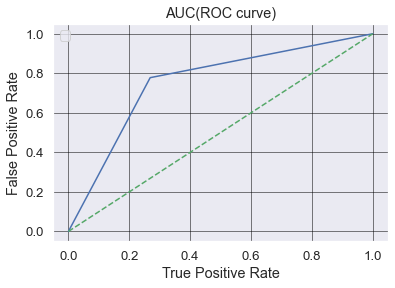


============ KNN ===========
Prediction Vector: 
 [0 1 1 ... 0 1 0]

 Accuracy: 
 71.62426614481409

 Precision of event Happening: 
 12.658227848101266

 Recall of event Happening: 
 74.07407407407408

 AUC: 
 0.727808386899296

 F-Score:
 0.21621621621621623

 Confusion Matrix: 
 [[692 276]
 [ 14  40]]
AUC Plot


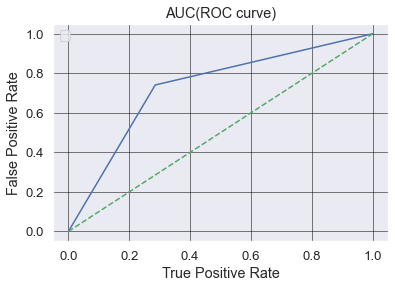


============ GadientBoosting ===========
Prediction Vector: 
 [1 1 1 ... 0 0 0]

 Accuracy: 
 71.62426614481409

 Precision of event Happening: 
 12.420382165605096

 Recall of event Happening: 
 72.22222222222221

 AUC: 
 0.7190656565656566

 F-Score:
 0.21195652173913043

 Confusion Matrix: 
 [[693 275]
 [ 15  39]]
AUC Plot


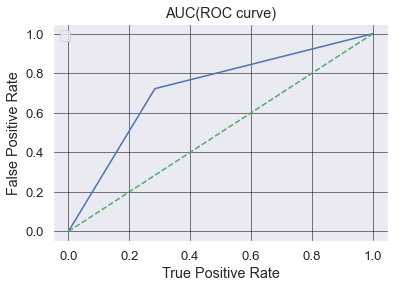


============ AdaBoost ===========
Prediction Vector: 
 [1 0 1 ... 0 0 0]

 Accuracy: 
 70.64579256360078

 Precision of event Happening: 
 11.320754716981133

 Recall of event Happening: 
 66.66666666666666

 AUC: 
 0.6876721763085398

 F-Score:
 0.1935483870967742

 Confusion Matrix: 
 [[686 282]
 [ 18  36]]
AUC Plot


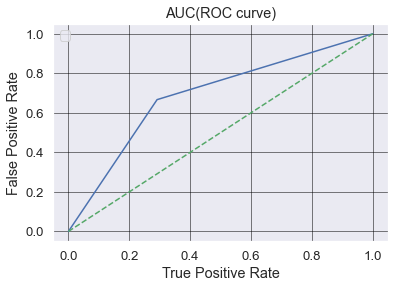


============ SVM ===========
Prediction Vector: 
 [1 1 1 ... 0 0 1]

 Accuracy: 
 71.62426614481409

 Precision of event Happening: 
 12.179487179487179

 Recall of event Happening: 
 70.37037037037037

 AUC: 
 0.7103229262320172

 F-Score:
 0.20765027322404372

 Confusion Matrix: 
 [[694 274]
 [ 16  38]]
AUC Plot


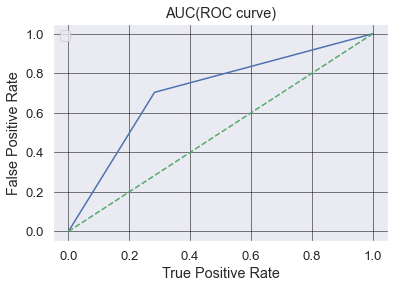


============ DecisionTree ===========
Prediction Vector: 
 [0 1 0 ... 0 1 0]

 Accuracy: 
 69.27592954990214

 Precision of event Happening: 
 10.365853658536585

 Recall of event Happening: 
 62.96296296296296

 AUC: 
 0.6629553106825835

 F-Score:
 0.1780104712041885

 Confusion Matrix: 
 [[674 294]
 [ 20  34]]
AUC Plot


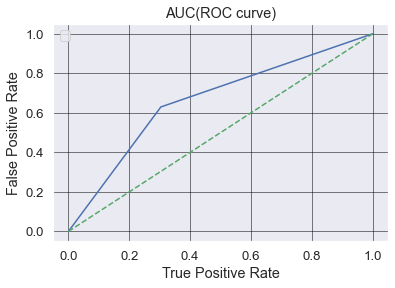


============ RandomForest ===========
Prediction Vector: 
 [0 1 1 ... 0 0 0]

 Accuracy: 
 72.70058708414872

 Precision of event Happening: 
 11.604095563139932

 Recall of event Happening: 
 62.96296296296296

 AUC: 
 0.6810338230792776

 F-Score:
 0.19596541786743518

 Confusion Matrix: 
 [[709 259]
 [ 20  34]]
AUC Plot


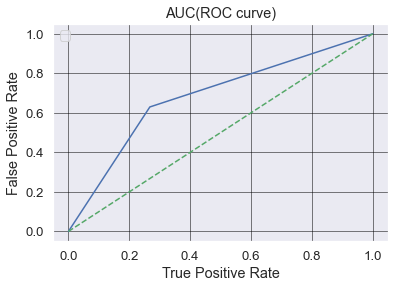


============ NaiveBayes ===========
Prediction Vector: 
 [1 1 1 ... 0 0 1]

 Accuracy: 
 69.56947162426614

 Precision of event Happening: 
 12.968299711815561

 Recall of event Happening: 
 83.33333333333334

 AUC: 
 0.7606749311294767

 F-Score:
 0.22443890274314215

 Confusion Matrix: 
 [[666 302]
 [  9  45]]
AUC Plot


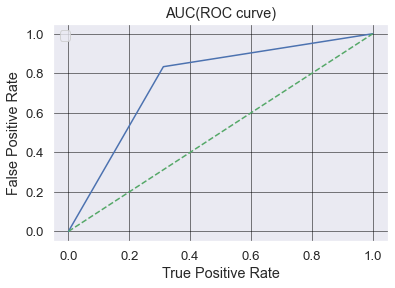


============ MultiLayerPerceptron ===========
Prediction Vector: 
 [0 1 1 ... 1 0 0]

 Accuracy: 
 40.019569471624266

 Precision of event Happening: 
 4.99194847020934

 Recall of event Happening: 
 57.407407407407405

 AUC: 
 0.4822849709213345

 F-Score:
 0.09185185185185185

 Confusion Matrix: 
 [[378 590]
 [ 23  31]]
AUC Plot


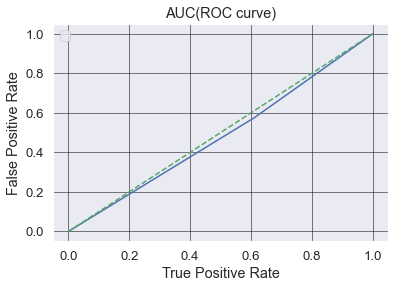


============ XgBoost ===========
[06:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction Vector: 
 [1 1 0 ... 0 0 0]

 Accuracy: 
 74.07045009784736

 Precision of event Happening: 
 13.240418118466899

 Recall of event Happening: 
 70.37037037037037

 AUC: 
 0.723236149372513

 F-Score:
 0.22287390029325513

 Confusion Matrix: 
 [[719 249]
 [ 16  38]]
AUC Plot


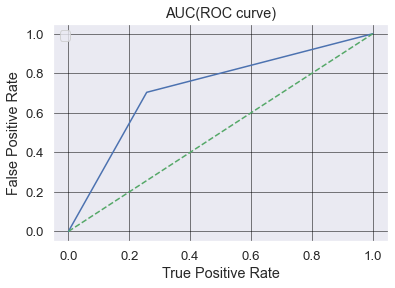


============ LightGbm ===========
[LightGBM] [Info] Number of positive: 195, number of negative: 195
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 390, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

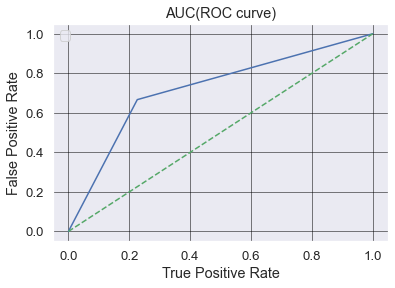

{'selected_features': ['age', 'avg_glucose_level', 'bmi', 'stroke'],
 'results': {'LogReg': LogisticRegression(),
  'KNN': KNeighborsClassifier(),
  'GadientBoosting': GradientBoostingClassifier(),
  'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=0),
  'SVM': SVC(),
  'DecisionTree': DecisionTreeClassifier(),
  'RandomForest': RandomForestClassifier(),
  'NaiveBayes': GaussianNB(),
  'MultiLayerPerceptron': MLPClassifier(hidden_layer_sizes=5),
  'XgBoost': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.01, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
           

In [13]:
#all algo with RF Feature selection only
tmp.MachineLearningwith_cls_imb_RFFS(strkdf, label)

age                               0.200464
avg_glucose_level                 0.031516
ever_married_Yes                  0.000000
hypertension                      0.000000
heart_disease                     0.000000
bmi                               0.000000
gender_Female                     0.000000
gender_Male                       0.000000
gender_Other                      0.000000
ever_married_No                   0.000000
smoking_status_smokes             0.000000
smoking_status_never smoked       0.000000
work_type_Never_worked            0.000000
work_type_Private                 0.000000
work_type_Self-employed           0.000000
work_type_children                0.000000
Residence_type_Rural              0.000000
Residence_type_Urban              0.000000
smoking_status_Unknown            0.000000
smoking_status_formerly smoked    0.000000
work_type_Govt_job                0.000000
dtype: float64
Selected Features =['age', 'avg_glucose_level']
(5110, 22)
============ LogReg ===

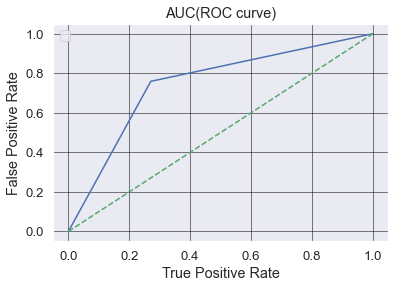


============ KNN ===========
Prediction Vector: 
 [1 1 1 ... 0 0 0]

 Accuracy: 
 71.3307240704501

 Precision of event Happening: 
 12.063492063492063

 Recall of event Happening: 
 70.37037037037037

 AUC: 
 0.7087733394551576

 F-Score:
 0.20596205962059622

 Confusion Matrix: 
 [[691 277]
 [ 16  38]]
AUC Plot


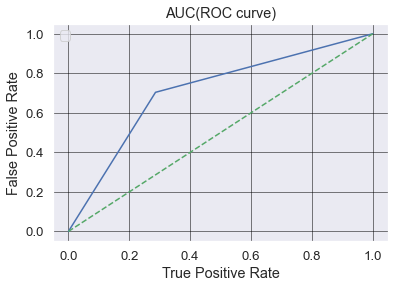


============ GadientBoosting ===========
Prediction Vector: 
 [0 0 1 ... 0 0 0]

 Accuracy: 
 70.54794520547945

 Precision of event Happening: 
 11.285266457680251

 Recall of event Happening: 
 66.66666666666666

 AUC: 
 0.6871556473829201

 F-Score:
 0.193029490616622

 Confusion Matrix: 
 [[685 283]
 [ 18  36]]
AUC Plot


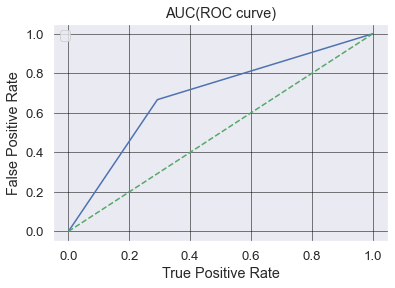


============ AdaBoost ===========
Prediction Vector: 
 [0 1 1 ... 0 0 0]

 Accuracy: 
 68.10176125244618

 Precision of event Happening: 
 10.0

 Recall of event Happening: 
 62.96296296296296

 AUC: 
 0.6567569635751455

 F-Score:
 0.17258883248730966

 Confusion Matrix: 
 [[662 306]
 [ 20  34]]
AUC Plot


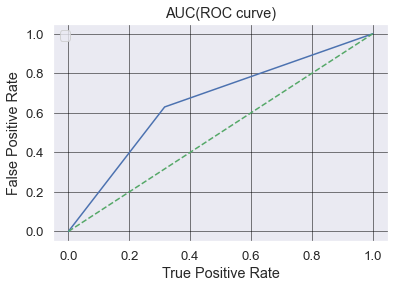


============ SVM ===========
Prediction Vector: 
 [1 1 1 ... 0 0 1]

 Accuracy: 
 71.52641878669276

 Precision of event Happening: 
 12.140575079872203

 Recall of event Happening: 
 70.37037037037037

 AUC: 
 0.7098063973063973

 F-Score:
 0.2070844686648501

 Confusion Matrix: 
 [[693 275]
 [ 16  38]]
AUC Plot


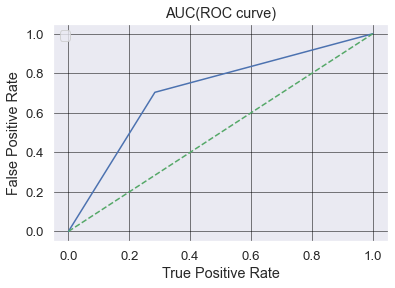


============ DecisionTree ===========
Prediction Vector: 
 [0 0 1 ... 0 0 1]

 Accuracy: 
 67.02544031311155

 Precision of event Happening: 
 10.80332409972299

 Recall of event Happening: 
 72.22222222222221

 AUC: 
 0.6947887970615244

 F-Score:
 0.18795180722891566

 Confusion Matrix: 
 [[646 322]
 [ 15  39]]
AUC Plot


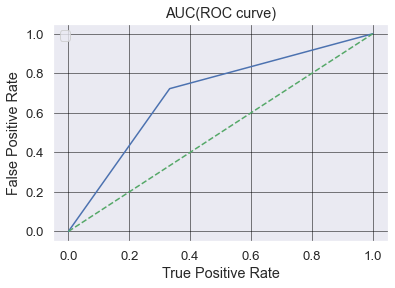


============ RandomForest ===========
Prediction Vector: 
 [0 1 1 ... 0 0 0]

 Accuracy: 
 72.70058708414872

 Precision of event Happening: 
 12.37458193979933

 Recall of event Happening: 
 68.51851851851852

 AUC: 
 0.707262014080196

 F-Score:
 0.2096317280453258

 Confusion Matrix: 
 [[706 262]
 [ 17  37]]
AUC Plot


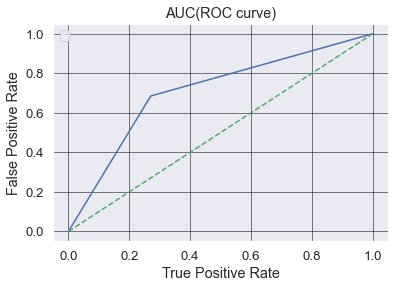


============ NaiveBayes ===========
Prediction Vector: 
 [1 1 1 ... 0 0 1]

 Accuracy: 
 69.86301369863014

 Precision of event Happening: 
 12.865497076023392

 Recall of event Happening: 
 81.48148148148148

 AUC: 
 0.7534817875726967

 F-Score:
 0.2222222222222222

 Confusion Matrix: 
 [[670 298]
 [ 10  44]]
AUC Plot


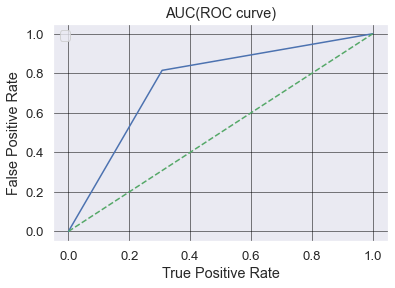


============ MultiLayerPerceptron ===========
Prediction Vector: 
 [1 1 1 ... 0 0 1]

 Accuracy: 
 55.38160469667319

 Precision of event Happening: 
 8.29875518672199

 Recall of event Happening: 
 74.07407407407408

 AUC: 
 0.6420645852464034

 F-Score:
 0.14925373134328357

 Confusion Matrix: 
 [[526 442]
 [ 14  40]]
AUC Plot


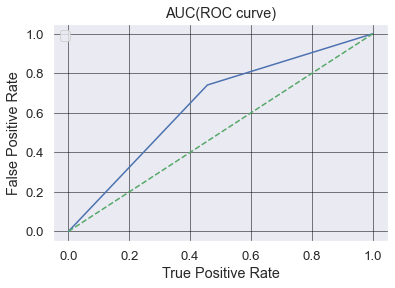


============ XgBoost ===========
[06:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Prediction Vector: 
 [0 1 1 ... 0 0 0]

 Accuracy: 
 69.47162426614481

 Precision of event Happening: 
 11.834319526627219

 Recall of event Happening: 
 74.07407407407408

 AUC: 
 0.7164447505356596

 F-Score:
 0.20408163265306126

 Confusion Matrix: 
 [[670 298]
 [ 14  40]]
AUC Plot


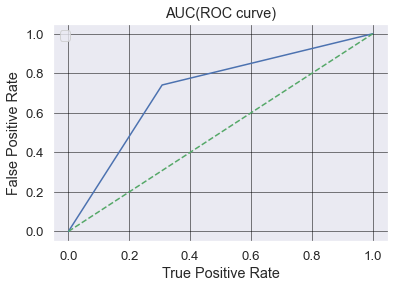


============ LightGbm ===========
[LightGBM] [Info] Number of positive: 195, number of negative: 195
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 390, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

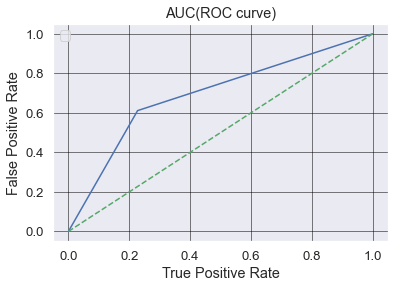

{'selected_features': ['age', 'avg_glucose_level', 'stroke'],
 'results': {'LogReg': LogisticRegression(),
  'KNN': KNeighborsClassifier(),
  'GadientBoosting': GradientBoostingClassifier(),
  'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=0),
  'SVM': SVC(),
  'DecisionTree': DecisionTreeClassifier(),
  'RandomForest': RandomForestClassifier(),
  'NaiveBayes': GaussianNB(),
  'MultiLayerPerceptron': MLPClassifier(hidden_layer_sizes=5),
  'XgBoost': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.01, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tr

In [14]:
#all algo with Lasso only
tmp.MachineLearningwith_cls_imb_LassoFS(strkdf, label)

In [16]:
#all algo with RF and CV
tmp.MachineLearningwith_cls_imb_RFFS_CV(strkdf, label)

avg_glucose_level                 26.679228
bmi                               23.528133
age                               23.344002
hypertension                       3.290332
heart_disease                      2.891709
Residence_type_Rural               2.161046
smoking_status_formerly smoked     2.131774
smoking_status_never smoked        2.010514
work_type_Private                  1.819571
Residence_type_Urban               1.718683
gender_Male                        1.662372
gender_Female                      1.558652
work_type_Self-employed            1.423391
ever_married_No                    1.401496
smoking_status_smokes              1.313446
smoking_status_Unknown             1.229508
work_type_Govt_job                 0.896484
ever_married_Yes                   0.856963
work_type_children                 0.079999
work_type_Never_worked             0.002697
gender_Other                       0.000000
dtype: float64
Selected Features =['avg_glucose_level', 'bmi', 'age']
(5110,

[LightGBM] [Info] Number of positive: 224, number of negative: 224
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Info] Number of positive: 224, number of negative: 224
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 335
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 224, number of negative: 224
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 448, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

{'selected_features': ['avg_glucose_level', 'bmi', 'age'],
 'results': {'LogReg': {'accuracy': 78.51836734693877,
   'precision': 76.83381674149193,
   'recall': 82.33333333333334,
   'auc_val': 0.7850833333333334,
   'f_score': 0.7915922392546063,
   'model_obj': LogisticRegression()},
  'KNN': {'accuracy': 78.91836734693877,
   'precision': 77.60551544774897,
   'recall': 81.56666666666666,
   'auc_val': 0.7892500000000001,
   'f_score': 0.7928011941618752,
   'model_obj': KNeighborsClassifier()},
  'GadientBoosting': {'accuracy': 77.12244897959184,
   'precision': 76.41610528482656,
   'recall': 79.13333333333334,
   'auc_val': 0.7711666666666666,
   'f_score': 0.7756127410775184,
   'model_obj': GradientBoostingClassifier()},
  'AdaBoost': {'accuracy': 76.52244897959183,
   'precision': 75.0142901667446,
   'recall': 80.33333333333334,
   'auc_val': 0.7650833333333333,
   'f_score': 0.7744299731351977,
   'model_obj': AdaBoostClassifier(n_estimators=100, random_state=0)},
  'SVM': 